In [2]:
import pandas as pd
import sklearn.impute as SimpleImputer

In [3]:
path_file = 'data/video_game_sales.csv'
video_game_df = pd.read_csv(path_file)
video_game_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Data Cleaning: Ensure the clean and ready for analysis. Handle any missing, incorrect, or irrelevant data.
# Check missing value count
missing_handle = video_game_df.isnull().sum()
missing_handle

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
# Dropping missing value rows and verify the missing value count
dropping_missing_value = video_game_df.dropna(subset=['Year', 'Publisher'], how='any')
dropping_missing_value.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**Correlation Analysis:**

- [x] Calculate the correlation coefficient matrix for the sales columns (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales).
- [x] Identify the pair of distinct variables (excluding one-to-one correlations like NA_Sales with NA_Sales) that have the strongest correlation.
- [x] Identify the pair of distinct variables that have the weakest correlation (the value closest to 0).

In [6]:
# Calculate the correlation coefficient matrix for the sales columns (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales).
sale_col_df = dropping_missing_value.filter(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
corr_matrix = sale_col_df.corr(method='pearson').abs()
corr_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.941269,0.903264,0.612774,0.747964,1.000000


_Identify the pair of distinct variables (excluding one-to-one correlations like NA_Sales with NA_Sales) that have the strongest correlation._

The strongest correlation is between NA_Sales and Global_Sales, with a correlation coefficient of 0.941269. This indicates a very strong positive linear relationship between North American Sales and Global Sales.

In [7]:
# Find the strongest correlated pair of sales columns excluding self-correlation.
strongest_corr = corr_matrix[corr_matrix != 1].unstack().sort_values(ascending=False).drop_duplicates()
strongest_corr.head(1)

NA_Sales  Global_Sales    0.941269
dtype: float64

_Identify the pair of distinct variables that have the weakest correlation (the value closest to 0)._

The weakest correlation is between JP_Sales and Other_Sales, with a correlation coefficient of 0.290559. This indicates a very weakest positive linear relationship between Japan Sales and Other Sales.

In [8]:
# Fint the weakest correlated pair of sales columns excluding self-correlation.
weakest_corr = corr_matrix[corr_matrix != 1].unstack().sort_values(ascending=True).drop_duplicates()
weakest_corr.head(1)

Other_Sales  JP_Sales    0.290559
dtype: float64

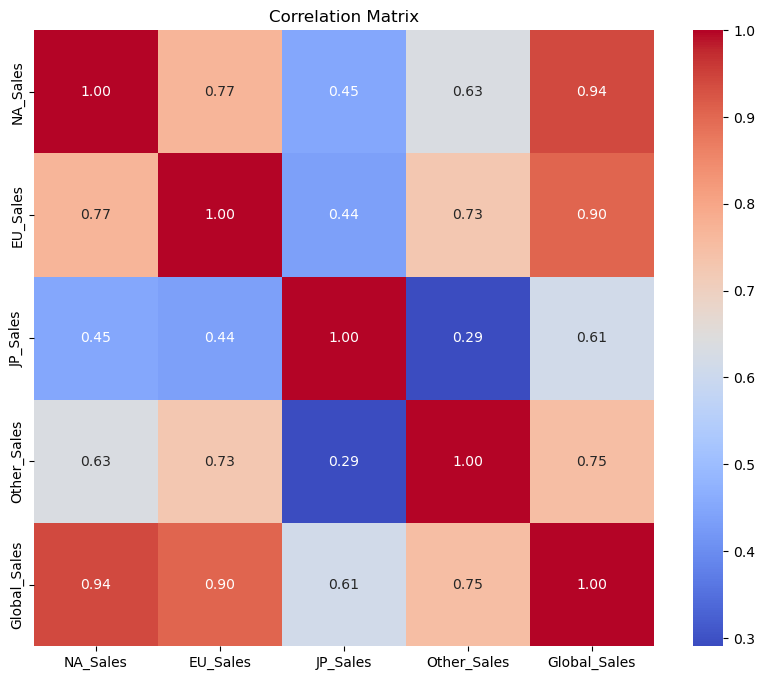

In [9]:
# Visualize the correlation matrix using a dot plot.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# show the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Matrix')
plt.show()